# Electric Vehicles Market Size Analysis using Python

In [1]:
import pandas as pd

ev_data = pd.read_csv('EV.csv')

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [2]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [3]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

# Questions:

##### 1. What trends can be observed in the growth of electric vehicle (EV) registrations over different model years?
##### 2. Which counties or cities have the highest number of registered electric vehicles?
##### 3. How has the popularity of each EV type evolved over time?
##### 4. Which makes and models are most frequently registered among electric vehicles?
##### 5. What is the average electric range of vehicles across different model years?
##### 6. What is the projected growth rate of the electric vehicle market over the next five years?

In [4]:
import matplotlib.pyplot as plt

# EV Adoption Over Time: Analyze the growth of the EV population by model year.

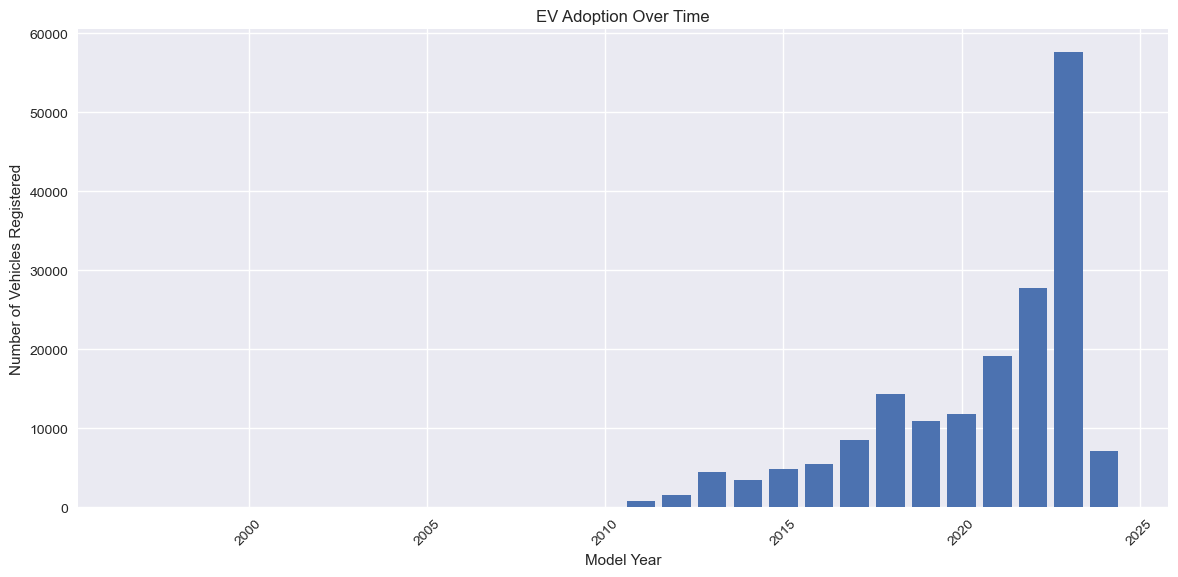

In [9]:
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
plt.bar(ev_adoption_by_year.index,ev_adoption_by_year.values)
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).

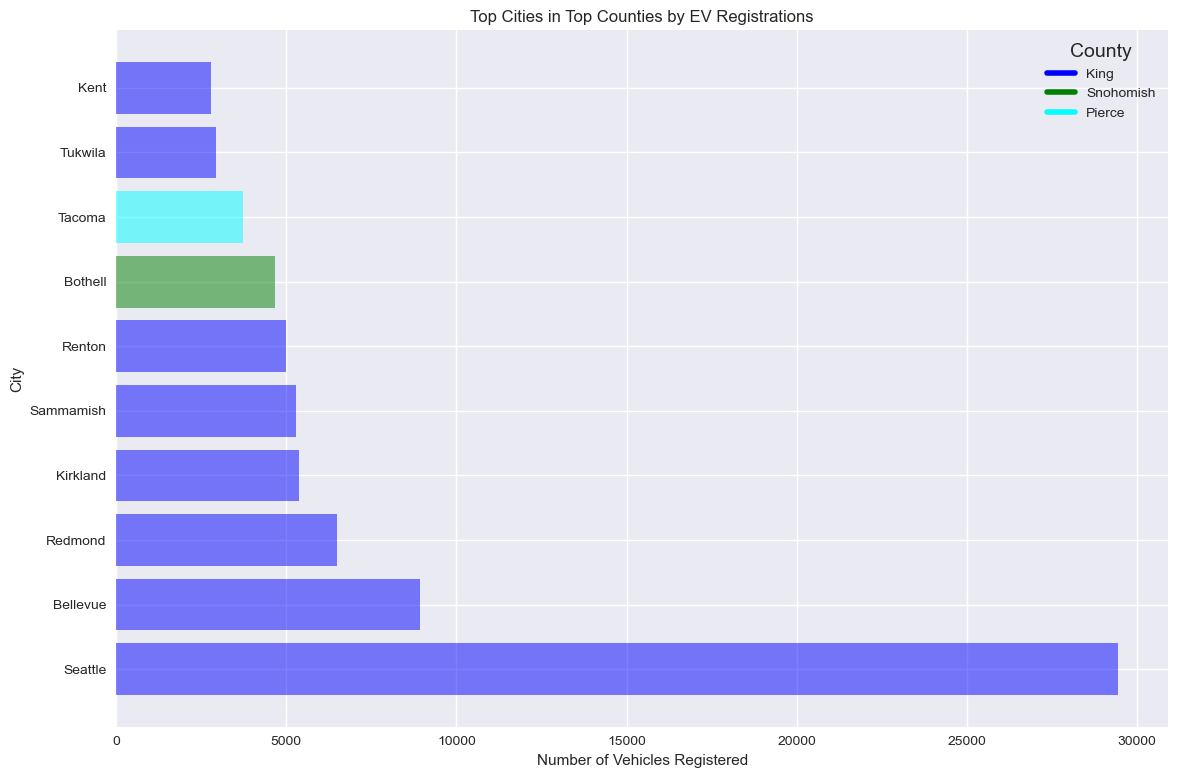

In [133]:
import matplotlib.lines as mlines

# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
a = top_cities['Number of Vehicles']
b = top_cities['City']


specific_colors = ['blue', 'green', 'cyan']
county_color_map = dict(zip(unique_counties, specific_colors))



bar_colors = [county_color_map[county] for county in top_cities['County']]
plt.barh(b,a,color = bar_colors,alpha = 0.50)

plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')


handles = [mlines.Line2D([], [], color=county_color_map[county], lw=4, label=county) for county in unique_counties]
plt.legend(handles=handles, title='County', loc='best')


#plt.legend(title='County')
plt.tight_layout()
plt.show()

# EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).

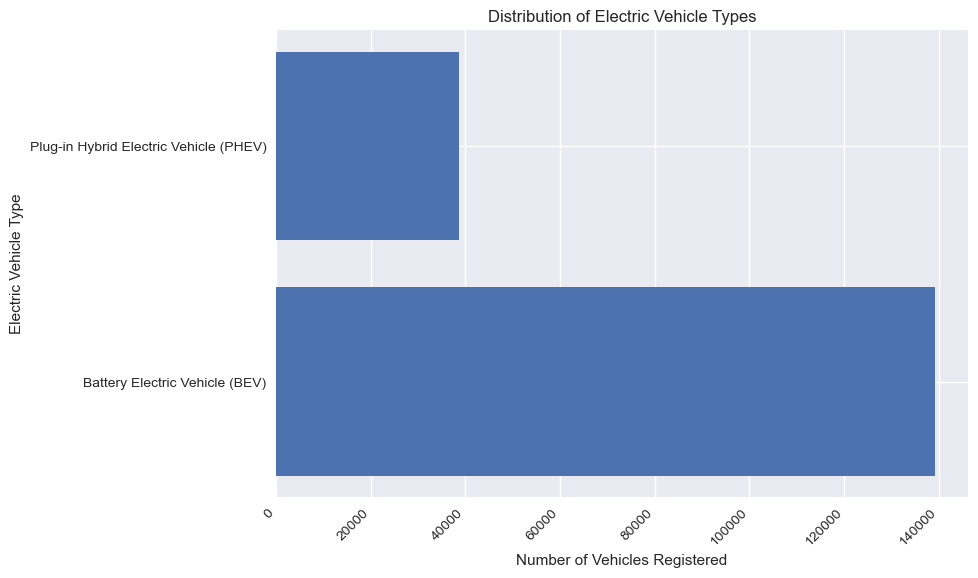

In [134]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))

values = ev_type_distribution.values
index = ev_type_distribution.index

plt.barh(index,values)

plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# Make and Model Popularity: Identify the most popular makes and models among the registered EVs.

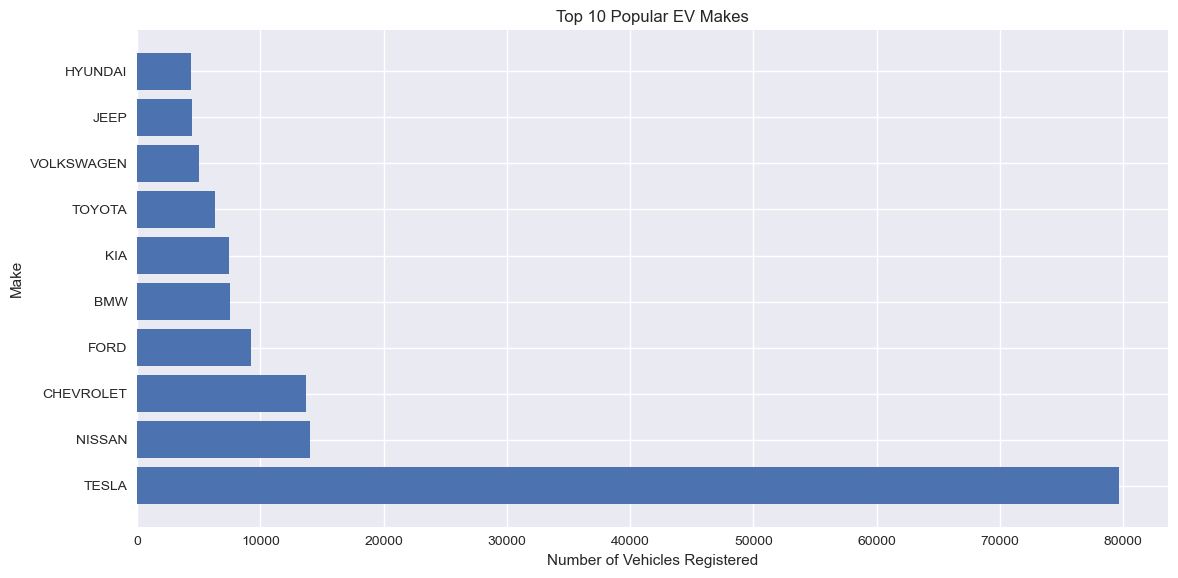

In [135]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
values = ev_make_distribution.values
index = ev_make_distribution.index
plt.barh(index , values)
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

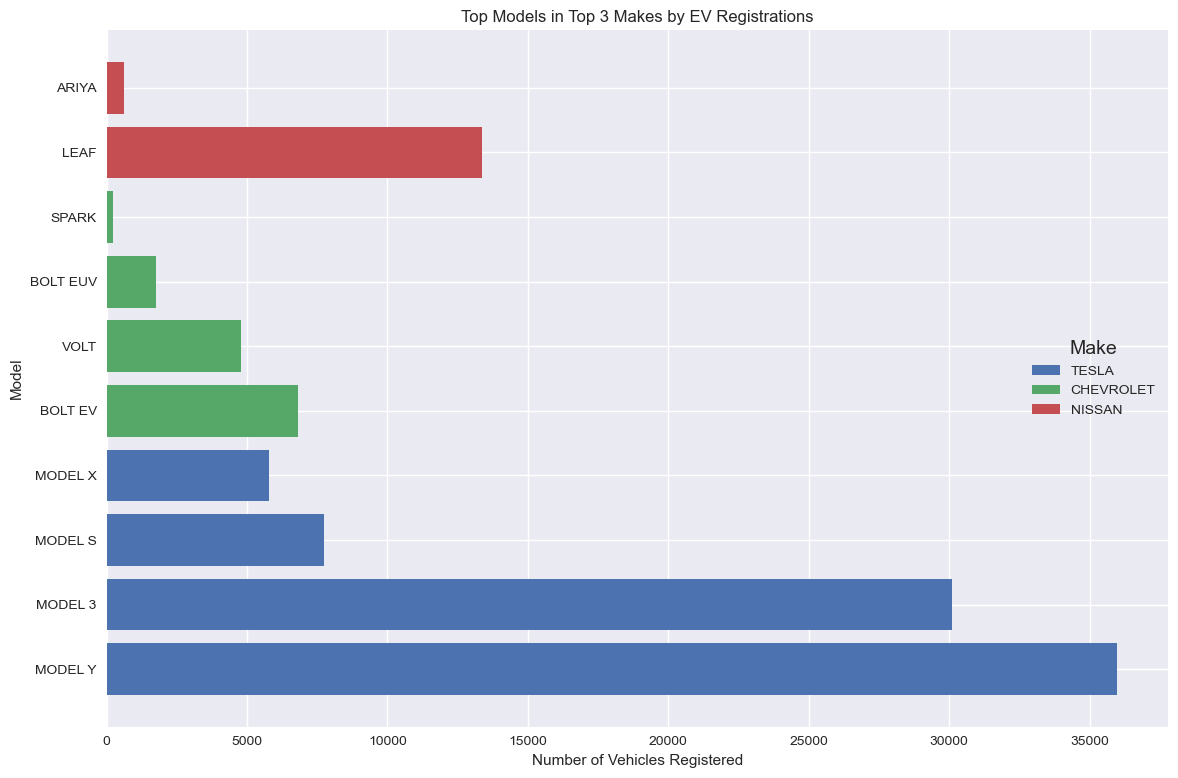

In [137]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))

for i, make in enumerate(unique_makes):
    subset = top_models[top_models['Make'] == make]
    plt.barh(subset['Model'], subset['Number of Vehicles'],label=make)

plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

# Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.

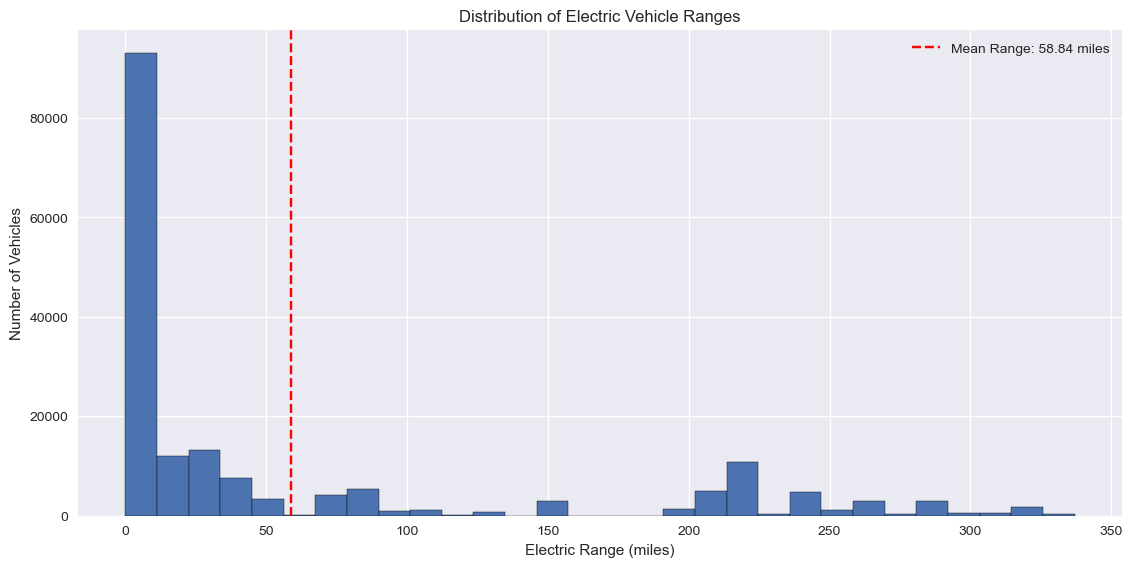

In [107]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
electric_range = ev_data['Electric Range']
plt.hist(electric_range, bins = 30,edgecolor = 'black')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

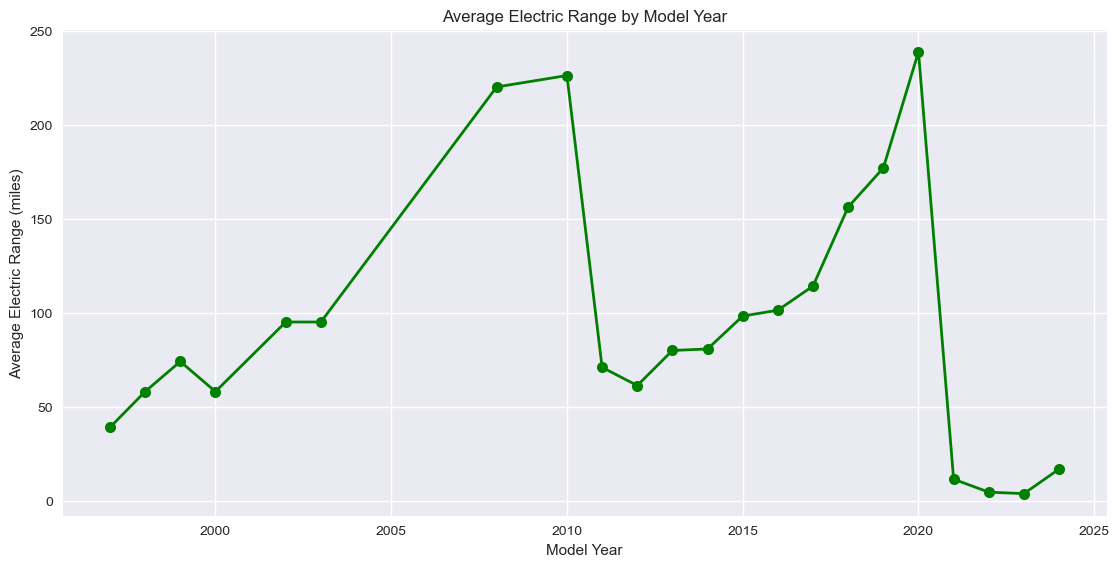

In [111]:
# Plotting
plt.figure(figsize=(12, 6))

# Line plot with markers
plt.plot(average_range_by_year['Model Year'], average_range_by_year['Electric Range'], 
         marker='o', color='green', linestyle='-', linewidth=2, markersize=8)

# Titles and labels
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)

# Show plot
plt.show()


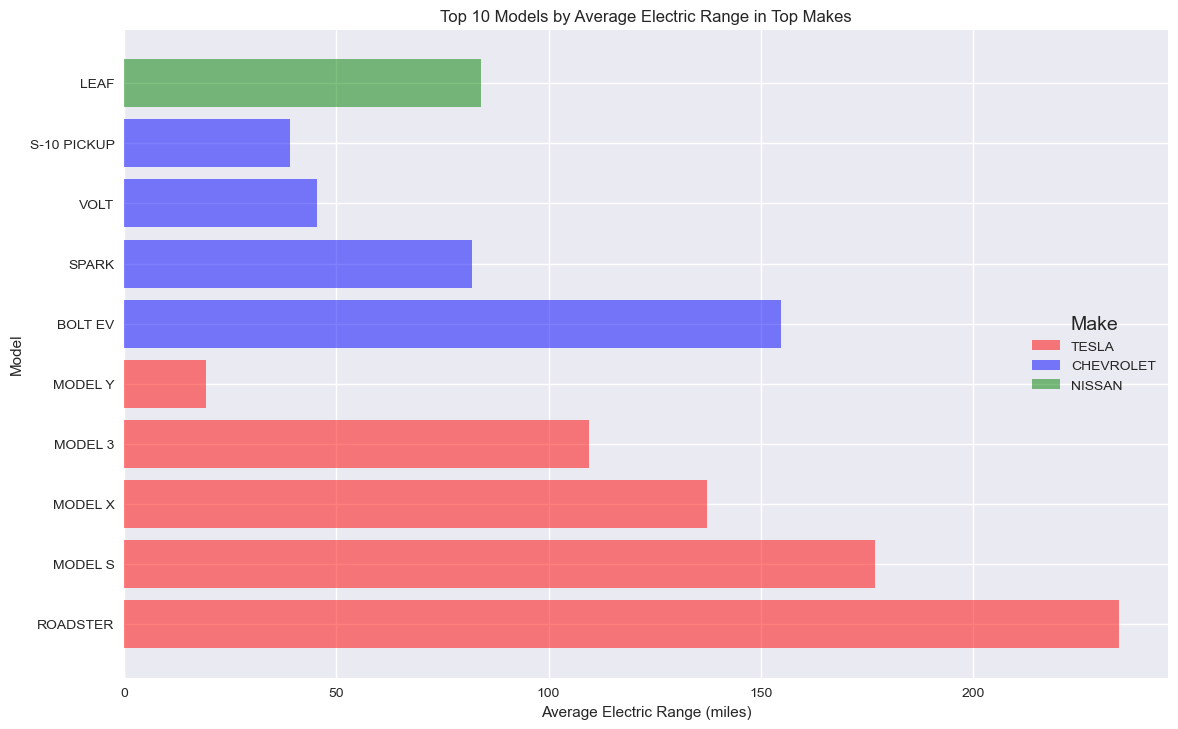

In [120]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_models = average_range_by_model.head(10)

# Prepare the data
models = top_range_models['Model']
ranges = top_range_models['Electric Range']
makes = top_range_models['Make']

# Plotting
plt.figure(figsize=(12, 8))

# Create a color map for the makes
unique_makes = makes.unique()
cmap = plt.get_cmap("cool")
#colors = [cmap(i / len(unique_makes)) for i in range(len(unique_makes))]
colors = ['red','blue','green']
# Plot each make separately for different colors
for make, color in zip(unique_makes, colors):
    subset = top_range_models[top_range_models['Make'] == make]
    plt.barh(subset['Model'], subset['Electric Range'], color=color,alpha = 0.5,  label=make)

# Titles and labels
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')

# Show plot
plt.show()


# Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

In [121]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64

In [140]:
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79092.26358070358, 2025: 119565.00850312428, 2026: 180748.2882793602, 2027: 273240.0066284026, 2028: 413061.179903938, 2029: 624431.02841697}


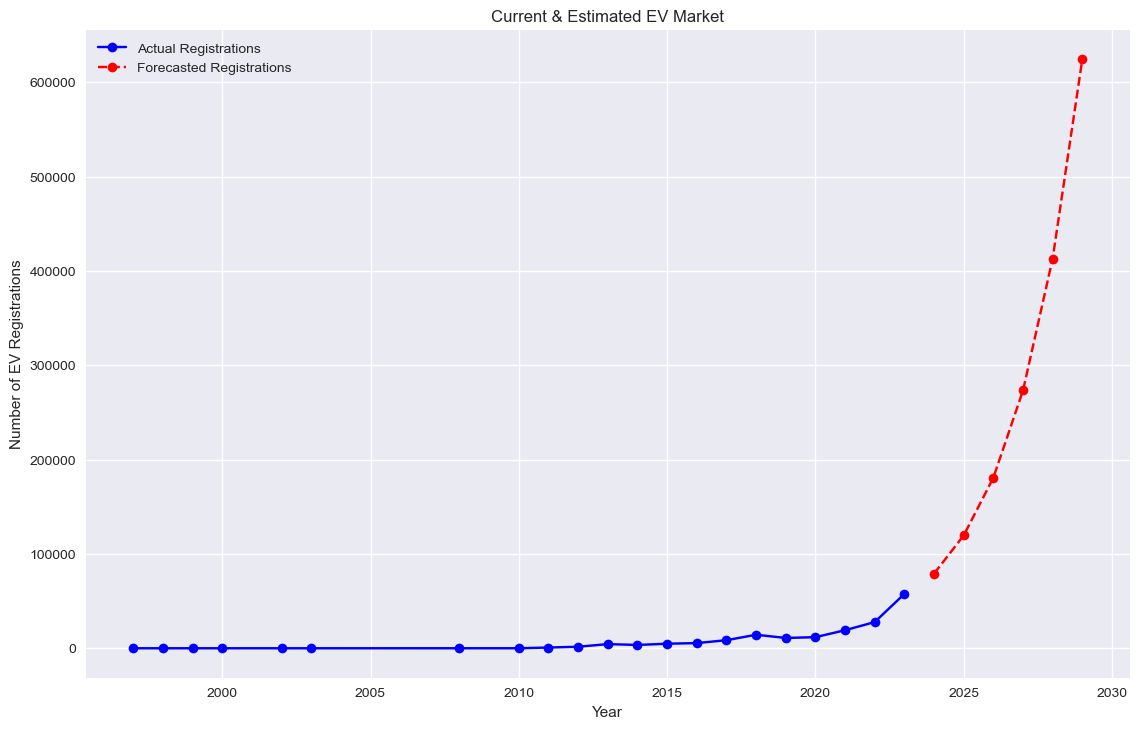

In [141]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()